<a href="https://colab.research.google.com/github/devvratin/bootstrapbydevvrat/blob/main/end_to_end_bulldozer_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐂 Predicting the SALE Price of Bulldozers using Machine Learning
In this notebook, we're going to go through an example machine learning project with the goal of predicting sale price of bulldozers.
## 1. Problem definition
## 2. Data
>> The data is downloaded from Kaggel comptition
[data](https://www.kaggle.com/competitions/bluebook-for-bulldozers/data)

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Sample submission files can be downloaded from the data page. Submission files should be formatted as follows:
[Evaluation](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation)

## 4. Features
## 5. Modeling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('/content/drive/MyDrive/bulldozer-price-prediction-project/data/TrainAndValid.csv',low_memory=False)
df.head(10)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,11/17/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,8/9/2007 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum().sort_values(ascending=False)

,0
Pushblock,386715
Tip_Control,386715
Enclosure_Type,386715
Engine_Horsepower,386715
Blade_Extension,386715
Blade_Width,386715
Scarifier,386704
Grouser_Tracks,367823
Hydraulics_Flow,367823
Coupler_System,367724


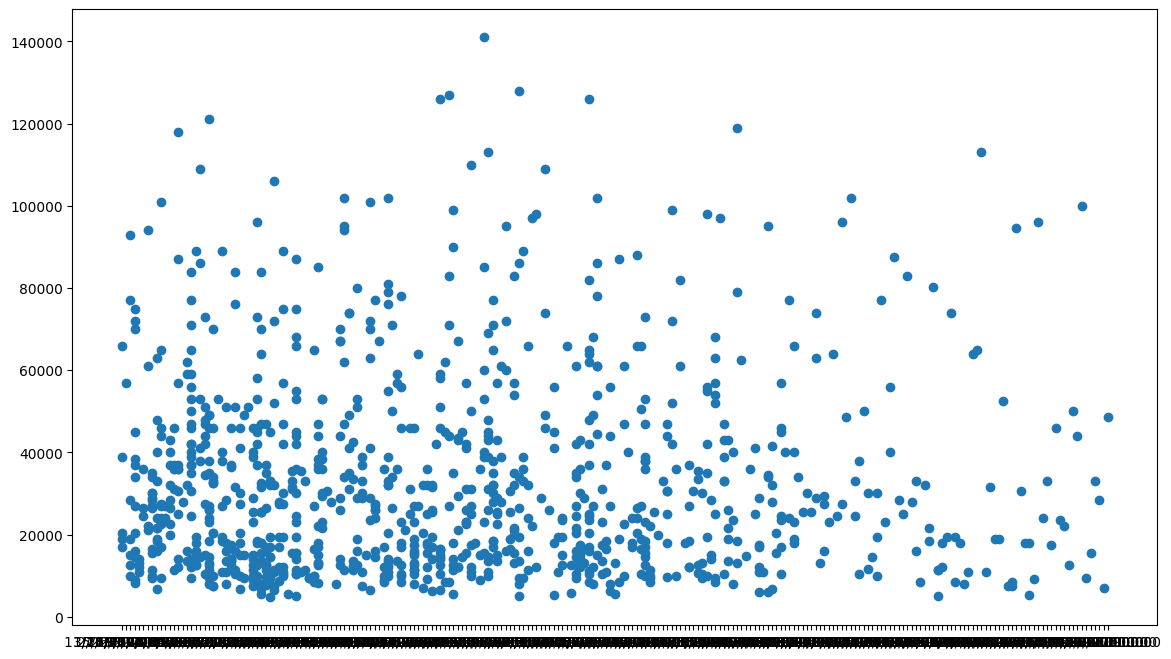

In [5]:
fig,ax = plt.subplots(figsize=(14, 8))

ax.scatter(df.saledate[:1000],df.SalePrice[:1000])

<Axes: ylabel='Frequency'>

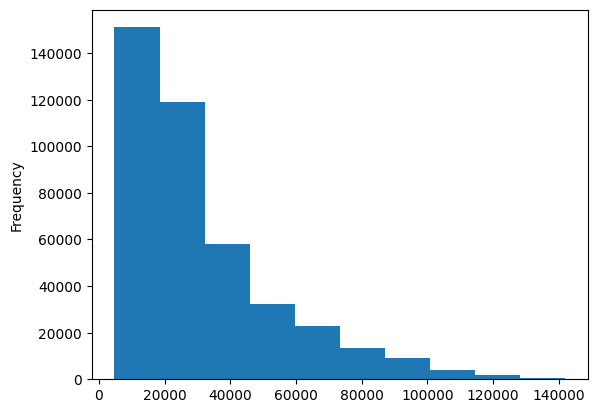

In [6]:
df.SalePrice.plot.hist()

### Parsing Dates
When we work with time series data , we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using 'parse_date' parameter

In [7]:
df.saledate.info()

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: saledate
Non-Null Count   Dtype 
--------------   ----- 
412698 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [8]:
df = pd.read_csv("/content/drive/MyDrive/bulldozer-price-prediction-project/data/TrainAndValid.csv",
                 low_memory= False,
                 parse_dates=['saledate'])

In [9]:
df.saledate.info()
df.saledate.head(5)

<class 'pandas.core.series.Series'>
RangeIndex: 412698 entries, 0 to 412697
Series name: saledate
Non-Null Count   Dtype         
--------------   -----         
412698 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.1 MB


,saledate
0,2006-11-16
1,2004-03-26
2,2004-02-26
3,2011-05-19
4,2009-07-23


In [10]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with time series data, it's good idea to sort it by date.

In [11]:
# sort dateframe in date order

df.sort_values(by= ['saledate'],inplace =True, ascending =True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


Make a copy of the originol data set so that i had enver lost

In [12]:
# Make a copy of the originol data set so that i had enver lost

df_temp= df.copy()

In [13]:
### Add datetime parameters for saledate column

In [14]:
df_temp.saledate.dt.month.value_counts()

,count
saledate,
3,59354
2,56319
6,47045
9,43214
12,39778
5,31989
4,30457
10,29527
11,25821


In [15]:
df_temp['saleYear'] = df_temp.saledate.dt.year
df_temp['saleMonth'] = df_temp.saledate.dt.month
df_temp['saleDay'] = df_temp.saledate.dt.day
df_temp['saleDayOfWeek'] = df_temp.saledate.dt.dayofweek
df_temp['saleDayOfYear'] = df_temp.saledate.dt.dayofyear

In [16]:
# Now we've enriched our DataFrame with date time features
df_temp.drop('saledate',axis=1, inplace= True)

<Axes: ylabel='Frequency'>

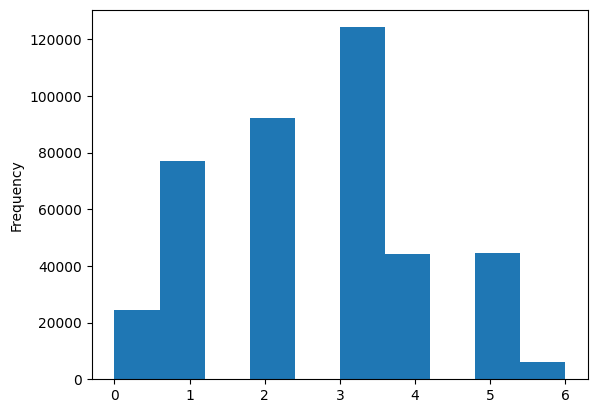

In [17]:
df_temp.saleDayOfWeek.plot.hist()

In [18]:

# month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# bar_width = 0.07

# unique_years = sorted(df_filtered_2000_onwards['saleYear'].unique())
# num_years = len(unique_years)

# colors = plt.cm.get_cmap('tab20', num_years)

# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# for month in range(1, 13):
#     row = (month - 1) // 4
#     col = (month - 1) % 4
#     ax = axes[row, col]

#     for year_index, year in enumerate(unique_years):
#         df_month_year = df_filtered_2000_onwards[(df_filtered_2000_onwards['saleYear'] == year) & (df_filtered_2000_onwards['saleMonth'] == month)]
#         sales_by_day = df_month_year['saleDayOfWeek'].value_counts().sort_index().reindex(range(7), fill_value=0)

#         days_of_week = np.arange(7)
#         bar_positions = days_of_week + (year_index - num_years / 2 + 0.5) * bar_width

#         ax.bar(bar_positions, sales_by_day, bar_width, label=str(year), color=colors(year_index))

#     ax.set_title(f'{month_names[month-1]}')
#     ax.set_xticks(days_of_week)
#     ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
#     ax.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

## 5. Modelling
We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.
// Exploretary data analysis..

### Convert String to categories

One way we can turn all of our data into numbers is by converting them into pandas categories from following [general utility functions ](https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html)

In [19]:
# pd.api.types.is_string_dtype(df_temp["UsageBand"])

# Find the Columns which contain strings
for label, content in df_temp.items():
  # print (label, columns)
  if pd.api.types.is_object_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [20]:
# If you're wondering what df.items() does, here's an example
# random_dict = {'key1': "hello",
#                'key2': 'wowrld!'}

# for key,

In [21]:
# This will turn all the string value into category values
for label, content in df_temp.items():
  if pd.api.types.is_string_dtype(content):
    df_temp[label] = content.astype('category').cat.as_ordered()

In [22]:
df_temp.state.cat.codes

,0
205615,43
274835,8
141296,8
212552,8
62755,8
...,...
410879,4
412476,4
411927,4
407124,4


Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

but we still have a bunch of missing data

In [23]:
# Check missing data
df_temp.isnull().sum()/len(df_temp)

,0
SalesID,0.000000
SalePrice,0.000000
MachineID,0.000000
ModelID,0.000000
datasource,0.000000
auctioneerID,0.048791
YearMade,0.000000
MachineHoursCurrentMeter,0.642586
UsageBand,0.821492
fiModelDesc,0.000000


Saving Preprocessed DAta

In [24]:
# Save preprocessed data
df_temp.to_csv('/content/drive/MyDrive/bulldozer-price-prediction-project/data/train_temp.csv', index=False)

In [25]:
# Import preprocessed data
df_temp = pd.read_csv("/content/drive/MyDrive/bulldozer-price-prediction-project/data/train_temp.csv")

/tmp/ipython-input-4068523095.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv("/content/drive/MyDrive/bulldozer-price-prediction-project/data/train_temp.csv")


## Fill Missing value

Fill numerical missing values first

In [26]:
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [27]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print (label)

auctioneerID
MachineHoursCurrentMeter


In [28]:
# Fill numeric rows with values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tellls us if the datat was missing
      df_temp[label+"_is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df_temp[label] = content.fillna(content.median())

In [29]:
# Check if there's been any null numeric values
for label, content in df_temp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [30]:
# Check to see how many examples weere missing
df_temp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
False,392562
True,20136


In [31]:
df_temp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,0
UsageBand,339028
fiModelDesc,0


In [32]:
# Counting no of different variable present
# for label,content in df_temp.items():
#   if

### Filling and turning categorical variables into numbers

In [33]:
# Check for columns which aren't numeric
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print (label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [34]:
# Turn Categorical variables into numbers and fill missing,.....
for label, content in df_temp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to incdicate whether sample had missing value
    df_temp[label+'_is_missing'] = pd.isnull(content)
    # Turn categories into numbers and add +1
    df_temp[label] = pd.Categorical(content).codes+1

In [35]:
pd.Categorical(df_temp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [36]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [37]:
df_temp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
...,...
Backhoe_Mounting_is_missing,0
Blade_Type_is_missing,0
Travel_Controls_is_missing,0
Differential_Type_is_missing,0


### We have achived following things
1. There are no missing values.
2. All the data are numeric value

In [38]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [39]:
%%time
from sklearn.ensemble import RandomForestRegressor
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state = 42, n_estimators=100)

# # Fit the model
# model.fit(df_temp.drop('SalePrice', axis=1),df_temp['SalePrice'])


CPU times: user 712 ms, sys: 58.7 ms, total: 771 ms
Wall time: 1 s


In [40]:
# model.score(df_temp.drop('SalePrice',axis =1), df_temp.SalePrice)

**Question** Why isn't this metric relaible? ( Why does the above metric hold Water?)

Always remember --> Fitting a machine learning model or Evaluating a machine learning model is just important as fitting the model...

In [41]:
# Split data into training and validation set
df_val = df_temp[df_temp.saleYear== 2012]
df_train = df_temp[df_temp.saleYear !=2012]

len(df_val), len(df_train)

(11573, 401125)

In [42]:
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice

x_val, y_val = df_val.drop('SalePrice', axis=1), df_val.SalePrice

In [43]:
# model.fit(x_train, y_train)

# model.score(x_val, y_val)

### Building an evaluation function


In [44]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import r2_score
def rmsle(y_test, y_preds):
  """
  Calculates root mean squared log error between predictions and true labels.
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
  train_preds = model.predict(x_train)
  val_preds = model.predict(x_val)
  scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
            "Valid MAE": mean_absolute_error(y_val, val_preds),
            "Training RMSLE": rmsle(y_train, train_preds),
            "Valid RMSLE": rmsle(y_val, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "valid R^2": r2_score(y_val, val_preds)}
  return scores

In [45]:
# show_scores(model)

## Testing our model on a subset (to tune the hyperparameters)


In [46]:
# This takes far too long .........
# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)
# model.fit(x_train, y_train)

In [47]:
# Change max_samples value
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,random_state=42,
                              max_samples = 5000)

# cutting down on the max number of samples
# each estimator can see improves training time
model.fit(x_train, y_train)

CPU times: user 25.1 s, sys: 151 ms, total: 25.2 s
Wall time: 15.2 s


RandomForestRegressor(max_samples=5000, n_jobs=-1, random_state=42)

In [48]:
# show_scores(model)

### Hyperparameter tuning with RandomizedSearchCV

In [49]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameter tunning
rf_grid = {"n_estimators": np.arange(10,100,20),
           'max_depth':[None, 5,10],
           'min_samples_split': np.arange(2,20,4),
           'min_samples_leaf':np.arange(1,20,4),
           'max_features': [1,'sqrt','log2'],
           'max_samples':[5000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state= 42),
                              param_distributions=rf_grid,
                              n_iter=5,
                              cv=5,
                              verbose=True)

# fit the randomizedsearchcv model
rs_model.fit(x_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: user 52.7 s, sys: 1.91 s, total: 54.6 s
Wall time: 44.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': [1, 'sqrt', 'log2'],
                                        'max_samples': [5000],
                                        'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                                        'min_samples_split': array([ 2,  6, 10, 14, 18]),
                                        'n_estimators': array([10, 30, 50, 70, 90])},
                   verbose=True)

In [50]:
# rs_model.best_params_

In [51]:
# find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(90),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(9),
 'max_samples': 5000,
 'max_features': 'sqrt',
 'max_depth': None}

In [52]:
# show_scores(rs_model)

In [53]:
rs_model= RandomForestRegressor(n_estimators=70,
                                min_samples_split= 2,
                                min_samples_leaf= 9,
                                max_samples= None,
                                max_features='log2',
                                max_depth= None,
                                random_state=42,
                                n_jobs=-1)
rs_model.fit(x_train,y_train)
show_scores(rs_model)

{'Training MAE': 6512.322286037791,
 'Valid MAE': 8338.896390079246,
 'Training RMSLE': np.float64(0.29621656049053896),
 'Valid RMSLE': np.float64(0.34123376681238515),
 'Training R^2': 0.8225122538927858,
 'valid R^2': 0.7881694370577601}

In [54]:
# Evaluate the Randomizedsearch model
show_scores(rs_model)

{'Training MAE': 6512.322286037791,
 'Valid MAE': 8338.896390079246,
 'Training RMSLE': np.float64(0.29621656049053896),
 'Valid RMSLE': np.float64(0.34123376681238515),
 'Training R^2': 0.8225122538927858,
 'valid R^2': 0.7881694370577601}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of 'RandomizedSearchCV'

In [55]:
ideal_model= RandomForestRegressor(n_estimators= 40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)
# Fit the ideal model
ideal_model.fit(x_train,y_train)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': np.float64(0.14469006962371858),
 'Valid RMSLE': np.float64(0.24524163989538328),
 'Training R^2': 0.9588145522577225,
 'valid R^2': 0.8818019502450094}

In [56]:
# Import the test data
df_test = pd.read_csv("/content/drive/MyDrive/bulldozer-price-prediction-project/data/Test.csv",
                      low_memory=False,
                      parse_dates= ['saledate'])
df_test.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [58]:
# # Make prediction on the test dataset
# test_preds = ideal_model.predict(df_test)

In [59]:
df_test.isna().sum()

,0
SalesID,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,0
YearMade,0
MachineHoursCurrentMeter,10328
UsageBand,10623
saledate,0
fiModelDesc,0


In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [61]:
x_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

### Preprocessing the data (getting the test dataset in the same format of our training dataset)

In [62]:
def preprocess_data(df):
  '''
  Performs transformation on df and returns transformed df.
  '''
  df['saleYear'] = df.saledate.dt.year
  df['saleMonth'] = df.saledate.dt.month
  df['saleDay'] = df.saledate.dt.day
  df['saleDayOfWeek'] = df.saledate.dt.dayofweek
  df['saleDayOfYear'] = df.saledate.dt.dayofyear

  df.drop('saledate',axis=1, inplace= True)

  # Fill numeric rows with values
  for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
      if pd.isnull(content).sum():
        # Add a binary column which tellls us if the datat was missing
        df[label+"_is_missing"] = pd.isnull(content)
        # Fill missing numeric values with median
        df[label] = content.fillna(content.median())

  # Turn Categorical variables into numbers and fill missing,.....
  for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
      # Add binary column to incdicate whether sample had missing value
      df[label+'_is_missing'] = pd.isnull(content)
      # Turn categories into numbers and add +1
      # because pandas encodes missing categories into -1
      df[label] = pd.Categorical(content).codes+1

  return df

In [63]:
processed_data = preprocess_data(df_test)


In [64]:
processed_data['auctioneerID_is_missing']=False


In [67]:
# # Make predictions on the test data
# test_preds = ideal_model.predict(df_test)

# # ValueError: The feature names should match those that were passed during fit.
# # Feature names must be in the same order as they were in fit.

In [70]:
# Align columns - the test set has one extra column, so remove it
processed_data = processed_data[x_train.columns]

In [71]:
# Make predictions on the test data
test_preds = ideal_model.predict(processed_data)

In [72]:
# Compare columns of training and processed test data
print("Columns in x_train:", x_train.columns)
print("\nColumns in processed_data:", processed_data.columns)

Columns in x_train: Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

Columns in processed_data: Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Tra

In [73]:
# Make prediction on the test dataset
test_preds = ideal_model.predict(processed_data)

In [74]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

We've made some predictions but they're not in the same format Kaggle is asking for:
[Bluebook-for-bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation)

In [75]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds['SalesID']= df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [76]:
# Export prediction data
df_preds.to_csv('/content/drive/MyDrive/bulldozer-price-prediction-project/test_prediction.csv')

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (Sale Price)

In [78]:
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [79]:
rs_model.feature_importances_

array([2.89830475e-02, 2.77906088e-02, 6.05167942e-02, 4.52553030e-03,
       4.06203067e-03, 1.05981851e-01, 6.39759114e-03, 3.81197475e-03,
       5.50432374e-02, 3.55085158e-02, 6.65497938e-02, 1.09751085e-02,
       3.04976411e-02, 6.71138854e-02, 4.10634248e-02, 4.61252288e-03,
       9.26469423e-03, 1.33228714e-02, 2.47783466e-03, 5.04132798e-02,
       5.60285843e-03, 8.73231505e-03, 7.59659289e-03, 3.54140056e-03,
       2.72089450e-03, 1.69908974e-03, 4.67183552e-03, 5.18010994e-03,
       5.65899733e-03, 3.24360205e-03, 1.26973949e-02, 7.86010774e-03,
       1.01198367e-02, 4.85889302e-04, 3.93510765e-03, 1.11879199e-02,
       2.75840946e-03, 1.13549581e-02, 1.32290027e-02, 1.26832312e-02,
       7.04646991e-03, 1.92277182e-03, 4.50070092e-03, 9.34254291e-04,
       4.09494461e-03, 2.99999067e-03, 1.15147343e-03, 6.49233335e-03,
       6.46895664e-03, 1.10949921e-03, 1.33177337e-03, 2.41005490e-02,
       3.37240259e-03, 3.53478727e-03, 2.52176629e-03, 5.18110065e-03,
      

In [92]:
# Helper function for plotting feature importancce
def plot_features(columns, importances, n=20):
  df = pd.DataFrame({'features': columns, 'feature_importances': importances})

  df = df.sort_values('feature_importances', ascending=False).reset_index(drop=True)

# Plot the dataframe
  display(df)
  fig,ax = plt.subplots()
  ax.barh(df['features'][:n], df['feature_importances'][:n])
  ax.set_ylabel('Features')
  ax.set_xlabel('Feature importance')
  ax.invert_yaxis()

,features,feature_importances
0,YearMade,0.208201
1,ProductSize,0.152517
2,saleYear,0.074242
3,fiSecondaryDesc,0.062382
4,Enclosure,0.061711
...,...,...
97,ProductGroup_is_missing,0.000000
98,fiModelDesc_is_missing,0.000000
99,fiBaseModel_is_missing,0.000000
100,state_is_missing,0.000000


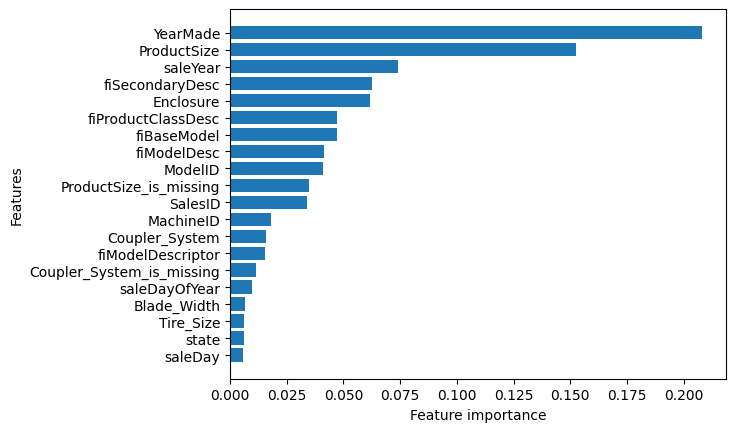

In [93]:
plot_features(x_train.columns, ideal_model.feature_importances_)

In [89]:
x_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [94]:
df['Enclosure'].value_counts()

,count
Enclosure,
OROPS,177971
EROPS,141769
EROPS w AC,92601
EROPS AC,18
NO ROPS,3
None or Unspecified,2


**Question to finish:** Why might knowing the feature importances of a trianed machine learning model be helpful?

**Final line** What other machine learning models could you try on our dataset? [Hint](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html): Check out the regression section of this map, or try to look at something like CatBoost.ai or XGBoost.ai.